In [1]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
#from keras
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.preprocessing import image
from keras.models import Model, model_from_json
from keras.layers import Input
#from sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# other imports
import numpy as np
import glob
import cv2
import h5py
import os
import json
import datetime
import time
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
# organize imports
from __future__ import print_function

In [3]:
with open('conf/conf2.json') as f:
    config = json.load(f)

In [4]:
model_name    = config["model"]
weights       = config["weights"]
include_top   = config["include_top"]
train_path    = config["train_path"]
features_path = config["features_path"]
labels_path   = config["labels_path"]
test_size     = config["test_size"]
results       = config["results"]
model_path    = config["model_path"]

In [5]:
base_model = MobileNet(include_top=include_top, weights=weights, input_tensor=Input(shape=(224,224,3)), input_shape=(224,224,3))
model = Model(base_model.input,base_model.get_layer('conv_pw_13_relu').output)
image_size = (224, 224)

In [6]:
train_labels = os.listdir(train_path)

# encode the labels
print ("[INFO] encoding labels...")
le = LabelEncoder()
le.fit([tl for tl in train_labels])

[INFO] encoding labels...


LabelEncoder()

In [7]:
# variables to hold features and labels
features = []
labels   = []

# loop over all the labels in the folder
count = 1
for i, label in enumerate(train_labels):
  cur_path = train_path + "/" + label
  count = 1
  for image_path in glob.glob(cur_path + "/*.jpg"):
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    feature = model.predict(x)
    flat = feature.flatten()
    features.append(flat)
    labels.append(label)
    print ("[INFO] processed - " + str(count))
    count += 1
  print ("[INFO] completed label - " + label)

[INFO] processed - 1
[INFO] processed - 2
[INFO] processed - 3
[INFO] processed - 4
[INFO] processed - 5
[INFO] processed - 6
[INFO] processed - 7
[INFO] processed - 8
[INFO] processed - 9
[INFO] processed - 10
[INFO] processed - 11
[INFO] processed - 12
[INFO] processed - 13
[INFO] processed - 14
[INFO] processed - 15
[INFO] processed - 16
[INFO] processed - 17
[INFO] processed - 18
[INFO] processed - 19
[INFO] processed - 20
[INFO] processed - 21
[INFO] processed - 22
[INFO] processed - 23
[INFO] processed - 24
[INFO] processed - 25
[INFO] processed - 26
[INFO] processed - 27
[INFO] processed - 28
[INFO] processed - 29
[INFO] processed - 30
[INFO] processed - 31
[INFO] processed - 32
[INFO] processed - 33
[INFO] processed - 34
[INFO] processed - 35
[INFO] processed - 36
[INFO] processed - 37
[INFO] processed - 38
[INFO] processed - 39
[INFO] processed - 40
[INFO] processed - 41
[INFO] processed - 42
[INFO] processed - 43
[INFO] processed - 44
[INFO] processed - 45
[INFO] processed - 

[INFO] processed - 363
[INFO] processed - 364
[INFO] processed - 365
[INFO] processed - 366
[INFO] processed - 367
[INFO] processed - 368
[INFO] processed - 369
[INFO] processed - 370
[INFO] processed - 371
[INFO] processed - 372
[INFO] processed - 373
[INFO] processed - 374
[INFO] processed - 375
[INFO] processed - 376
[INFO] processed - 377
[INFO] processed - 378
[INFO] processed - 379
[INFO] processed - 380
[INFO] processed - 381
[INFO] processed - 382
[INFO] processed - 383
[INFO] processed - 384
[INFO] processed - 385
[INFO] processed - 386
[INFO] processed - 387
[INFO] processed - 388
[INFO] processed - 389
[INFO] processed - 390
[INFO] processed - 391
[INFO] processed - 392
[INFO] processed - 393
[INFO] processed - 394
[INFO] processed - 395
[INFO] processed - 396
[INFO] processed - 397
[INFO] processed - 398
[INFO] processed - 399
[INFO] processed - 400
[INFO] processed - 401
[INFO] processed - 402
[INFO] processed - 403
[INFO] processed - 404
[INFO] processed - 405
[INFO] proc

[INFO] processed - 720
[INFO] processed - 721
[INFO] processed - 722
[INFO] processed - 723
[INFO] processed - 724
[INFO] processed - 725
[INFO] processed - 726
[INFO] processed - 727
[INFO] processed - 728
[INFO] processed - 729
[INFO] processed - 730
[INFO] processed - 731
[INFO] processed - 732
[INFO] processed - 733
[INFO] processed - 734
[INFO] processed - 735
[INFO] processed - 736
[INFO] processed - 737
[INFO] processed - 738
[INFO] processed - 739
[INFO] processed - 740
[INFO] processed - 741
[INFO] processed - 742
[INFO] processed - 743
[INFO] processed - 744
[INFO] completed label - Eosinophil
[INFO] processed - 1
[INFO] processed - 2
[INFO] processed - 3
[INFO] processed - 4
[INFO] processed - 5
[INFO] processed - 6
[INFO] processed - 7
[INFO] processed - 8
[INFO] processed - 9
[INFO] processed - 10
[INFO] processed - 11
[INFO] processed - 12
[INFO] processed - 13
[INFO] processed - 14
[INFO] processed - 15
[INFO] processed - 16
[INFO] processed - 17
[INFO] processed - 18
[I

[INFO] processed - 338
[INFO] processed - 339
[INFO] processed - 340
[INFO] processed - 341
[INFO] processed - 342
[INFO] processed - 343
[INFO] processed - 344
[INFO] processed - 345
[INFO] processed - 346
[INFO] processed - 347
[INFO] processed - 348
[INFO] processed - 349
[INFO] processed - 350
[INFO] processed - 351
[INFO] processed - 352
[INFO] processed - 353
[INFO] processed - 354
[INFO] processed - 355
[INFO] processed - 356
[INFO] processed - 357
[INFO] processed - 358
[INFO] processed - 359
[INFO] processed - 360
[INFO] processed - 361
[INFO] processed - 362
[INFO] processed - 363
[INFO] processed - 364
[INFO] processed - 365
[INFO] processed - 366
[INFO] processed - 367
[INFO] processed - 368
[INFO] processed - 369
[INFO] processed - 370
[INFO] processed - 371
[INFO] processed - 372
[INFO] processed - 373
[INFO] processed - 374
[INFO] processed - 375
[INFO] processed - 376
[INFO] processed - 377
[INFO] processed - 378
[INFO] processed - 379
[INFO] processed - 380
[INFO] proc

[INFO] processed - 697
[INFO] processed - 698
[INFO] processed - 699
[INFO] processed - 700
[INFO] processed - 701
[INFO] processed - 702
[INFO] processed - 703
[INFO] processed - 704
[INFO] processed - 705
[INFO] processed - 706
[INFO] processed - 707
[INFO] processed - 708
[INFO] processed - 709
[INFO] processed - 710
[INFO] processed - 711
[INFO] processed - 712
[INFO] processed - 713
[INFO] processed - 714
[INFO] processed - 715
[INFO] processed - 716
[INFO] processed - 717
[INFO] processed - 718
[INFO] processed - 719
[INFO] processed - 720
[INFO] processed - 721
[INFO] processed - 722
[INFO] processed - 723
[INFO] processed - 724
[INFO] processed - 725
[INFO] processed - 726
[INFO] processed - 727
[INFO] processed - 728
[INFO] processed - 729
[INFO] processed - 730
[INFO] processed - 731
[INFO] processed - 732
[INFO] processed - 733
[INFO] processed - 734
[INFO] processed - 735
[INFO] processed - 736
[INFO] processed - 737
[INFO] processed - 738
[INFO] processed - 739
[INFO] proc

[INFO] processed - 1053
[INFO] processed - 1054
[INFO] processed - 1055
[INFO] processed - 1056
[INFO] processed - 1057
[INFO] processed - 1058
[INFO] processed - 1059
[INFO] processed - 1060
[INFO] processed - 1061
[INFO] processed - 1062
[INFO] processed - 1063
[INFO] processed - 1064
[INFO] processed - 1065
[INFO] processed - 1066
[INFO] processed - 1067
[INFO] processed - 1068
[INFO] processed - 1069
[INFO] processed - 1070
[INFO] processed - 1071
[INFO] processed - 1072
[INFO] processed - 1073
[INFO] processed - 1074
[INFO] processed - 1075
[INFO] processed - 1076
[INFO] processed - 1077
[INFO] processed - 1078
[INFO] processed - 1079
[INFO] processed - 1080
[INFO] processed - 1081
[INFO] processed - 1082
[INFO] processed - 1083
[INFO] processed - 1084
[INFO] processed - 1085
[INFO] processed - 1086
[INFO] processed - 1087
[INFO] processed - 1088
[INFO] processed - 1089
[INFO] processed - 1090
[INFO] processed - 1091
[INFO] processed - 1092
[INFO] processed - 1093
[INFO] processed

[INFO] processed - 1395
[INFO] processed - 1396
[INFO] processed - 1397
[INFO] processed - 1398
[INFO] processed - 1399
[INFO] processed - 1400
[INFO] processed - 1401
[INFO] processed - 1402
[INFO] processed - 1403
[INFO] processed - 1404
[INFO] processed - 1405
[INFO] processed - 1406
[INFO] processed - 1407
[INFO] processed - 1408
[INFO] processed - 1409
[INFO] processed - 1410
[INFO] processed - 1411
[INFO] processed - 1412
[INFO] processed - 1413
[INFO] processed - 1414
[INFO] processed - 1415
[INFO] processed - 1416
[INFO] processed - 1417
[INFO] processed - 1418
[INFO] processed - 1419
[INFO] processed - 1420
[INFO] processed - 1421
[INFO] processed - 1422
[INFO] processed - 1423
[INFO] processed - 1424
[INFO] processed - 1425
[INFO] processed - 1426
[INFO] processed - 1427
[INFO] processed - 1428
[INFO] processed - 1429
[INFO] processed - 1430
[INFO] processed - 1431
[INFO] processed - 1432
[INFO] processed - 1433
[INFO] processed - 1434
[INFO] processed - 1435
[INFO] processed

[INFO] processed - 1737
[INFO] processed - 1738
[INFO] processed - 1739
[INFO] processed - 1740
[INFO] processed - 1741
[INFO] processed - 1742
[INFO] processed - 1743
[INFO] processed - 1744
[INFO] processed - 1745
[INFO] processed - 1746
[INFO] processed - 1747
[INFO] processed - 1748
[INFO] processed - 1749
[INFO] processed - 1750
[INFO] processed - 1751
[INFO] processed - 1752
[INFO] processed - 1753
[INFO] processed - 1754
[INFO] processed - 1755
[INFO] processed - 1756
[INFO] processed - 1757
[INFO] processed - 1758
[INFO] processed - 1759
[INFO] processed - 1760
[INFO] processed - 1761
[INFO] processed - 1762
[INFO] processed - 1763
[INFO] processed - 1764
[INFO] processed - 1765
[INFO] processed - 1766
[INFO] processed - 1767
[INFO] processed - 1768
[INFO] processed - 1769
[INFO] processed - 1770
[INFO] processed - 1771
[INFO] processed - 1772
[INFO] processed - 1773
[INFO] processed - 1774
[INFO] processed - 1775
[INFO] processed - 1776
[INFO] processed - 1777
[INFO] processed

[INFO] processed - 2080
[INFO] processed - 2081
[INFO] processed - 2082
[INFO] processed - 2083
[INFO] processed - 2084
[INFO] processed - 2085
[INFO] processed - 2086
[INFO] processed - 2087
[INFO] processed - 2088
[INFO] processed - 2089
[INFO] processed - 2090
[INFO] processed - 2091
[INFO] processed - 2092
[INFO] processed - 2093
[INFO] processed - 2094
[INFO] processed - 2095
[INFO] processed - 2096
[INFO] processed - 2097
[INFO] processed - 2098
[INFO] processed - 2099
[INFO] processed - 2100
[INFO] processed - 2101
[INFO] processed - 2102
[INFO] processed - 2103
[INFO] processed - 2104
[INFO] processed - 2105
[INFO] processed - 2106
[INFO] processed - 2107
[INFO] processed - 2108
[INFO] processed - 2109
[INFO] processed - 2110
[INFO] processed - 2111
[INFO] processed - 2112
[INFO] processed - 2113
[INFO] processed - 2114
[INFO] processed - 2115
[INFO] processed - 2116
[INFO] processed - 2117
[INFO] processed - 2118
[INFO] processed - 2119
[INFO] processed - 2120
[INFO] processed

[INFO] processed - 291
[INFO] processed - 292
[INFO] processed - 293
[INFO] processed - 294
[INFO] processed - 295
[INFO] processed - 296
[INFO] processed - 297
[INFO] processed - 298
[INFO] processed - 299
[INFO] processed - 300
[INFO] processed - 301
[INFO] processed - 302
[INFO] processed - 303
[INFO] processed - 304
[INFO] processed - 305
[INFO] processed - 306
[INFO] processed - 307
[INFO] processed - 308
[INFO] processed - 309
[INFO] processed - 310
[INFO] processed - 311
[INFO] processed - 312
[INFO] processed - 313
[INFO] processed - 314
[INFO] processed - 315
[INFO] processed - 316
[INFO] processed - 317
[INFO] processed - 318
[INFO] processed - 319
[INFO] processed - 320
[INFO] processed - 321
[INFO] processed - 322
[INFO] processed - 323
[INFO] processed - 324
[INFO] processed - 325
[INFO] processed - 326
[INFO] processed - 327
[INFO] processed - 328
[INFO] processed - 329
[INFO] processed - 330
[INFO] processed - 331
[INFO] processed - 332
[INFO] processed - 333
[INFO] proc

[INFO] processed - 91
[INFO] processed - 92
[INFO] processed - 93
[INFO] processed - 94
[INFO] processed - 95
[INFO] processed - 96
[INFO] processed - 97
[INFO] processed - 98
[INFO] processed - 99
[INFO] processed - 100
[INFO] processed - 101
[INFO] processed - 102
[INFO] processed - 103
[INFO] processed - 104
[INFO] processed - 105
[INFO] processed - 106
[INFO] processed - 107
[INFO] processed - 108
[INFO] processed - 109
[INFO] processed - 110
[INFO] processed - 111
[INFO] processed - 112
[INFO] processed - 113
[INFO] processed - 114
[INFO] processed - 115
[INFO] processed - 116
[INFO] processed - 117
[INFO] processed - 118
[INFO] processed - 119
[INFO] processed - 120
[INFO] processed - 121
[INFO] processed - 122
[INFO] processed - 123
[INFO] processed - 124
[INFO] processed - 125
[INFO] processed - 126
[INFO] processed - 127
[INFO] processed - 128
[INFO] processed - 129
[INFO] processed - 130
[INFO] processed - 131
[INFO] processed - 132
[INFO] processed - 133
[INFO] processed - 1

[INFO] processed - 451
[INFO] processed - 452
[INFO] processed - 453
[INFO] processed - 454
[INFO] processed - 455
[INFO] processed - 456
[INFO] processed - 457
[INFO] processed - 458
[INFO] processed - 459
[INFO] processed - 460
[INFO] processed - 461
[INFO] processed - 462
[INFO] processed - 463
[INFO] processed - 464
[INFO] processed - 465
[INFO] processed - 466
[INFO] processed - 467
[INFO] processed - 468
[INFO] processed - 469
[INFO] processed - 470
[INFO] processed - 471
[INFO] processed - 472
[INFO] processed - 473
[INFO] processed - 474
[INFO] processed - 475
[INFO] processed - 476
[INFO] processed - 477
[INFO] processed - 478
[INFO] processed - 479
[INFO] processed - 480
[INFO] processed - 481
[INFO] processed - 482
[INFO] processed - 483
[INFO] processed - 484
[INFO] processed - 485
[INFO] processed - 486
[INFO] processed - 487
[INFO] processed - 488
[INFO] processed - 489
[INFO] processed - 490
[INFO] processed - 491
[INFO] processed - 492
[INFO] processed - 493
[INFO] proc

[INFO] processed - 809
[INFO] processed - 810
[INFO] processed - 811
[INFO] processed - 812
[INFO] processed - 813
[INFO] processed - 814
[INFO] processed - 815
[INFO] processed - 816
[INFO] processed - 817
[INFO] processed - 818
[INFO] processed - 819
[INFO] processed - 820
[INFO] processed - 821
[INFO] processed - 822
[INFO] processed - 823
[INFO] processed - 824
[INFO] processed - 825
[INFO] processed - 826
[INFO] processed - 827
[INFO] processed - 828
[INFO] processed - 829
[INFO] processed - 830
[INFO] processed - 831
[INFO] processed - 832
[INFO] processed - 833
[INFO] processed - 834
[INFO] processed - 835
[INFO] processed - 836
[INFO] processed - 837
[INFO] processed - 838
[INFO] processed - 839
[INFO] processed - 840
[INFO] processed - 841
[INFO] processed - 842
[INFO] processed - 843
[INFO] processed - 844
[INFO] processed - 845
[INFO] processed - 846
[INFO] processed - 847
[INFO] processed - 848
[INFO] processed - 849
[INFO] processed - 850
[INFO] processed - 851
[INFO] proc

[INFO] processed - 1159
[INFO] processed - 1160
[INFO] processed - 1161
[INFO] processed - 1162
[INFO] processed - 1163
[INFO] processed - 1164
[INFO] processed - 1165
[INFO] processed - 1166
[INFO] processed - 1167
[INFO] processed - 1168
[INFO] processed - 1169
[INFO] processed - 1170
[INFO] processed - 1171
[INFO] processed - 1172
[INFO] processed - 1173
[INFO] processed - 1174
[INFO] processed - 1175
[INFO] processed - 1176
[INFO] processed - 1177
[INFO] processed - 1178
[INFO] processed - 1179
[INFO] processed - 1180
[INFO] processed - 1181
[INFO] processed - 1182
[INFO] processed - 1183
[INFO] processed - 1184
[INFO] processed - 1185
[INFO] processed - 1186
[INFO] processed - 1187
[INFO] processed - 1188
[INFO] processed - 1189
[INFO] processed - 1190
[INFO] processed - 1191
[INFO] processed - 1192
[INFO] processed - 1193
[INFO] processed - 1194
[INFO] processed - 1195
[INFO] processed - 1196
[INFO] processed - 1197
[INFO] processed - 1198
[INFO] processed - 1199
[INFO] processed

[INFO] processed - 1502
[INFO] processed - 1503
[INFO] processed - 1504
[INFO] processed - 1505
[INFO] processed - 1506
[INFO] processed - 1507
[INFO] processed - 1508
[INFO] processed - 1509
[INFO] processed - 1510
[INFO] processed - 1511
[INFO] processed - 1512
[INFO] processed - 1513
[INFO] processed - 1514
[INFO] processed - 1515
[INFO] processed - 1516
[INFO] processed - 1517
[INFO] processed - 1518
[INFO] processed - 1519
[INFO] processed - 1520
[INFO] processed - 1521
[INFO] processed - 1522
[INFO] processed - 1523
[INFO] processed - 1524
[INFO] processed - 1525
[INFO] processed - 1526
[INFO] processed - 1527
[INFO] processed - 1528
[INFO] processed - 1529
[INFO] processed - 1530
[INFO] processed - 1531
[INFO] processed - 1532
[INFO] processed - 1533
[INFO] processed - 1534
[INFO] processed - 1535
[INFO] processed - 1536
[INFO] processed - 1537
[INFO] processed - 1538
[INFO] processed - 1539
[INFO] processed - 1540
[INFO] processed - 1541
[INFO] processed - 1542
[INFO] processed

[INFO] processed - 1845
[INFO] processed - 1846
[INFO] processed - 1847
[INFO] processed - 1848
[INFO] processed - 1849
[INFO] processed - 1850
[INFO] processed - 1851
[INFO] processed - 1852
[INFO] processed - 1853
[INFO] processed - 1854
[INFO] processed - 1855
[INFO] processed - 1856
[INFO] processed - 1857
[INFO] processed - 1858
[INFO] processed - 1859
[INFO] processed - 1860
[INFO] processed - 1861
[INFO] processed - 1862
[INFO] processed - 1863
[INFO] processed - 1864
[INFO] processed - 1865
[INFO] processed - 1866
[INFO] processed - 1867
[INFO] processed - 1868
[INFO] processed - 1869
[INFO] processed - 1870
[INFO] processed - 1871
[INFO] processed - 1872
[INFO] processed - 1873
[INFO] processed - 1874
[INFO] processed - 1875
[INFO] processed - 1876
[INFO] processed - 1877
[INFO] processed - 1878
[INFO] processed - 1879
[INFO] processed - 1880
[INFO] processed - 1881
[INFO] processed - 1882
[INFO] processed - 1883
[INFO] processed - 1884
[INFO] processed - 1885
[INFO] processed

[INFO] processed - 2187
[INFO] processed - 2188
[INFO] processed - 2189
[INFO] processed - 2190
[INFO] processed - 2191
[INFO] processed - 2192
[INFO] processed - 2193
[INFO] processed - 2194
[INFO] processed - 2195
[INFO] processed - 2196
[INFO] processed - 2197
[INFO] processed - 2198
[INFO] processed - 2199
[INFO] processed - 2200
[INFO] processed - 2201
[INFO] processed - 2202
[INFO] processed - 2203
[INFO] processed - 2204
[INFO] processed - 2205
[INFO] processed - 2206
[INFO] processed - 2207
[INFO] processed - 2208
[INFO] processed - 2209
[INFO] processed - 2210
[INFO] processed - 2211
[INFO] processed - 2212
[INFO] processed - 2213
[INFO] processed - 2214
[INFO] processed - 2215
[INFO] processed - 2216
[INFO] processed - 2217
[INFO] processed - 2218
[INFO] processed - 2219
[INFO] processed - 2220
[INFO] processed - 2221
[INFO] processed - 2222
[INFO] processed - 2223
[INFO] processed - 2224
[INFO] processed - 2225
[INFO] processed - 2226
[INFO] processed - 2227
[INFO] processed

[INFO] processed - 2529
[INFO] processed - 2530
[INFO] processed - 2531
[INFO] processed - 2532
[INFO] processed - 2533
[INFO] processed - 2534
[INFO] processed - 2535
[INFO] processed - 2536
[INFO] processed - 2537
[INFO] processed - 2538
[INFO] processed - 2539
[INFO] processed - 2540
[INFO] processed - 2541
[INFO] processed - 2542
[INFO] processed - 2543
[INFO] processed - 2544
[INFO] processed - 2545
[INFO] processed - 2546
[INFO] processed - 2547
[INFO] processed - 2548
[INFO] processed - 2549
[INFO] processed - 2550
[INFO] processed - 2551
[INFO] processed - 2552
[INFO] processed - 2553
[INFO] processed - 2554
[INFO] processed - 2555
[INFO] processed - 2556
[INFO] processed - 2557
[INFO] processed - 2558
[INFO] processed - 2559
[INFO] processed - 2560
[INFO] processed - 2561
[INFO] processed - 2562
[INFO] processed - 2563
[INFO] processed - 2564
[INFO] processed - 2565
[INFO] processed - 2566
[INFO] processed - 2567
[INFO] processed - 2568
[INFO] processed - 2569
[INFO] processed

[INFO] processed - 2872
[INFO] processed - 2873
[INFO] processed - 2874
[INFO] processed - 2875
[INFO] processed - 2876
[INFO] processed - 2877
[INFO] processed - 2878
[INFO] processed - 2879
[INFO] processed - 2880
[INFO] processed - 2881
[INFO] processed - 2882
[INFO] processed - 2883
[INFO] processed - 2884
[INFO] processed - 2885
[INFO] processed - 2886
[INFO] processed - 2887
[INFO] processed - 2888
[INFO] processed - 2889
[INFO] processed - 2890
[INFO] processed - 2891
[INFO] processed - 2892
[INFO] processed - 2893
[INFO] processed - 2894
[INFO] processed - 2895
[INFO] processed - 2896
[INFO] processed - 2897
[INFO] processed - 2898
[INFO] processed - 2899
[INFO] processed - 2900
[INFO] processed - 2901
[INFO] processed - 2902
[INFO] processed - 2903
[INFO] processed - 2904
[INFO] processed - 2905
[INFO] processed - 2906
[INFO] processed - 2907
[INFO] processed - 2908
[INFO] processed - 2909
[INFO] processed - 2910
[INFO] processed - 2911
[INFO] processed - 2912
[INFO] processed

[INFO] processed - 3214
[INFO] processed - 3215
[INFO] processed - 3216
[INFO] processed - 3217
[INFO] processed - 3218
[INFO] processed - 3219
[INFO] processed - 3220
[INFO] processed - 3221
[INFO] processed - 3222
[INFO] processed - 3223
[INFO] processed - 3224
[INFO] processed - 3225
[INFO] processed - 3226
[INFO] processed - 3227
[INFO] processed - 3228
[INFO] processed - 3229
[INFO] processed - 3230
[INFO] processed - 3231
[INFO] processed - 3232
[INFO] processed - 3233
[INFO] processed - 3234
[INFO] processed - 3235
[INFO] processed - 3236
[INFO] processed - 3237
[INFO] processed - 3238
[INFO] processed - 3239
[INFO] processed - 3240
[INFO] processed - 3241
[INFO] processed - 3242
[INFO] processed - 3243
[INFO] processed - 3244
[INFO] processed - 3245
[INFO] processed - 3246
[INFO] processed - 3247
[INFO] processed - 3248
[INFO] processed - 3249
[INFO] processed - 3250
[INFO] processed - 3251
[INFO] processed - 3252
[INFO] processed - 3253
[INFO] processed - 3254
[INFO] processed

[INFO] processed - 3557
[INFO] processed - 3558
[INFO] processed - 3559
[INFO] processed - 3560
[INFO] processed - 3561
[INFO] processed - 3562
[INFO] processed - 3563
[INFO] processed - 3564
[INFO] processed - 3565
[INFO] processed - 3566
[INFO] processed - 3567
[INFO] processed - 3568
[INFO] processed - 3569
[INFO] processed - 3570
[INFO] processed - 3571
[INFO] processed - 3572
[INFO] processed - 3573
[INFO] processed - 3574
[INFO] processed - 3575
[INFO] processed - 3576
[INFO] processed - 3577
[INFO] processed - 3578
[INFO] processed - 3579
[INFO] processed - 3580
[INFO] processed - 3581
[INFO] processed - 3582
[INFO] processed - 3583
[INFO] processed - 3584
[INFO] processed - 3585
[INFO] processed - 3586
[INFO] processed - 3587
[INFO] processed - 3588
[INFO] processed - 3589
[INFO] processed - 3590
[INFO] processed - 3591
[INFO] processed - 3592
[INFO] processed - 3593
[INFO] processed - 3594
[INFO] processed - 3595
[INFO] processed - 3596
[INFO] processed - 3597
[INFO] processed

In [8]:
# encode the labels using LabelEncoder
le = LabelEncoder()
le_labels = le.fit_transform(labels)

In [9]:
# save features and labels
h5f_data = h5py.File(features_path, 'w')
h5f_data.create_dataset('dataset_1', data=np.array(features))

h5f_label = h5py.File(labels_path, 'w')
h5f_label.create_dataset('dataset_1', data=np.array(le_labels))

h5f_data.close()
h5f_label.close()

In [10]:
# save model and weights
model_json = model.to_json()
with open(model_path + str(test_size) + ".json", "w") as json_file:
   json_file.write(model_json)

In [11]:
# save weights
model.save_weights(model_path + str(test_size) + ".h5")
print("[STATUS] saved model and weights to disk..")

print ("[STATUS] features and labels saved..")

[STATUS] saved model and weights to disk..
[STATUS] features and labels saved..


In [12]:
# config variables
test_size       = config["test_size"]
seed            = config["seed"]
features_path   = config["features_path"]
labels_path     = config["labels_path"]
results         = config["results"]
classifier_path = config["classifier_path"]
train_path      = config["train_path"]
num_classes     = config["num_classes"]
classifier_path = config["classifier_path"]

In [13]:
# import features and labels
h5f_data  = h5py.File(features_path, 'r')
h5f_label = h5py.File(labels_path, 'r')

features_string = h5f_data['dataset_1']
labels_string   = h5f_label['dataset_1']

features = np.array(features_string)
labels   = np.array(labels_string)

h5f_data.close()
h5f_label.close()

In [14]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(features),
                                                                  np.array(labels),
                                                                  test_size=test_size, 
                                                                  random_state=seed)

In [15]:
print ("[INFO] splitted train and test data...")
print ("[INFO] train data  : {}".format(trainData.shape))
print ("[INFO] test data   : {}".format(testData.shape))
print ("[INFO] train labels: {}".format(trainLabels.shape))
print ("[INFO] test labels : {}".format(testLabels.shape))

[INFO] splitted train and test data...
[INFO] train data  : (6355, 50176)
[INFO] test data   : (707, 50176)
[INFO] train labels: (6355,)
[INFO] test labels : (707,)


In [16]:
model = LogisticRegression(random_state=seed,max_iter=10000)
model.fit(trainData, trainLabels)

LogisticRegression(max_iter=10000, random_state=9)

In [17]:
# use rank-1 and rank-5 predictions
print ("[INFO] evaluating model...")
f = open(results, "w")
rank_1 = 0
rank_5 = 0

[INFO] evaluating model...


In [18]:
# loop over test data
for (label, features) in zip(testLabels, testData):
    # predict the probability of each class label and
    # take the top-5 class labels
    predictions = model.predict_proba(np.atleast_2d(features))[0]
   #predictions = model.predict_proba(testData, batch_size=1)
    predictions = np.argsort(predictions)[::-1][:5]

    # rank-1 prediction increment
    if label == predictions[0]:
        rank_1 += 1

	#rank-5 prediction increment
 #   if label in predictions:
 #      rank_5 += 1

# convert accuracies to percentages
rank_1 = (rank_1 / float(len(testLabels))) * 100
#rank_5 = (rank_5 / float(len(testLabels))) * 100

# write the accuracies to file
f.write("Rank-1: {:.2f}%\n".format(rank_1))
#f.write("Rank-5: {:.2f}%\n\n".format(rank_5))

15

In [19]:
#evaluate the model of test data
preds = model.predict(testData)

# write the classification report to file
f.write("{}\n".format(classification_report(testLabels, preds)))
f.close()

In [20]:
labels = sorted(list(os.listdir(train_path)))

[[ 55   0   3   7]
 [  0 198   3   4]
 [  2   3  57   3]
 [  1   2   1 368]]


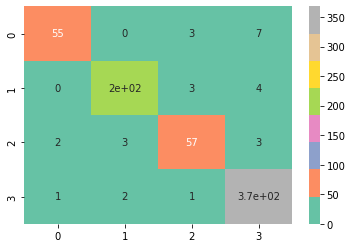

In [21]:
# plot the confusion matrix
cm = confusion_matrix(testLabels, preds)
print(cm)
sns.heatmap(cm,
            annot=True,
            cmap="Set2")
plt.show()

In [22]:
def conMatrix(Matrix):
    metrics = pd.DataFrame(index =['Sensitivity', 'Specificity','Error','accuracy'],
                       columns =  ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL'])
    Map = 0   
    for i in range (0,len(cm)):
        TP = Matrix[i][i]
        FN = sum(Matrix[i])-TP #row 
        FP = sum(Matrix[:,i])-TP #col
        TN = sum(sum(Matrix))-TP-FN-FP

        accuracy = (TP+TN)/(TP+TN+FP+FN)
        error = 1-TP/sum(Matrix[i])
        sensitivity = TP/(TP+FN)
        specificity = TN/(TN+FP) 

        metrics.iloc[0][i] = round(sensitivity,4)
        metrics.iloc[1][i] = round(specificity,4)
        metrics.iloc[2][i] = round(error,4)
        metrics.iloc[3][i] = round(accuracy,4)
        Map += metrics.iloc[3][i] 
    print(metrics)
    print(Map/4)

In [23]:
conMatrix(cm)

            EOSINOPHIL LYMPHOCYTE MONOCYTE NEUTROPHIL
Sensitivity     0.8462     0.9659   0.8769     0.9892
Specificity     0.9953       0.99   0.9891     0.9582
Error           0.1538     0.0341   0.1231     0.0108
accuracy        0.9816      0.983   0.9788     0.9745
0.979475
